# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](http://yann.lecun.com/exdb/mnist/) and include:

88% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
95.3% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)

MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Imports

In [1]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [2]:
transforms = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,)),])

mnist_train = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transforms)
mnist_test = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transforms)

# Create training set and define training dataloader
trainData = torch.utils.data.DataLoader(mnist_train, batch_size=64, shuffle=True)

# Create test set and define test dataloader
testData = torch.utils.data.DataLoader(mnist_test, batch_size=64, shuffle=True)

/opt/conda/lib/python3.7/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:178.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

I chose the ToTensor() transform in order to convert the image data into numerical data that can be used by NNs. Otherwise, the neural network would not have been able to train on the dataset.

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [3]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

0


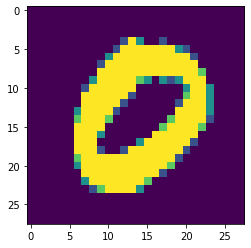

8


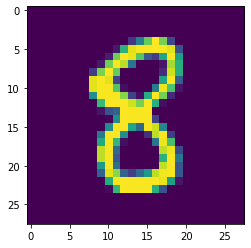

2


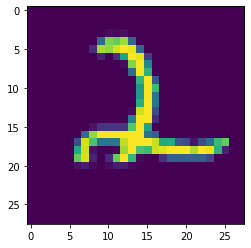

0


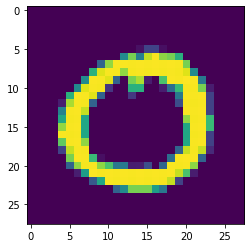

1


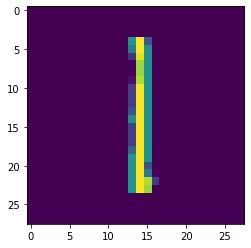

In [4]:
# Explore data
show5(trainData)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [5]:
network = nn.Sequential(nn.Flatten(1, -1),
                        nn.Linear(784, 256),
                        nn.ReLU(),
                        nn.Linear(256, 64),
                        nn.ReLU(),
                        nn.Linear(64, 10),
                        nn.LogSoftmax(dim=1))

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

optimizer = optim.SGD(network.parameters(), lr=0.005, momentum=0.5)
criterion = nn.NLLLoss()

network.to(device)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Linear(in_features=256, out_features=64, bias=True)
  (4): ReLU()
  (5): Linear(in_features=64, out_features=10, bias=True)
  (6): LogSoftmax(dim=1)
)

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [11]:
epochs = 15
losses = []

for e in range(epochs):
    running_loss = 0
    for images, labels in trainData:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        
        output = network(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        
    else:
        print("Epoch", e+1, "- Training Loss: ", running_loss/len(trainData))
        losses.append(running_loss/len(trainData))

Epoch 0 - Training Loss:  0.33382362035959007
Epoch 1 - Training Loss:  0.29960283339182453
Epoch 2 - Training Loss:  0.27277945457840524
Epoch 3 - Training Loss:  0.2505849048828901
Epoch 4 - Training Loss:  0.22961727171135482
Epoch 5 - Training Loss:  0.2097288052053022
Epoch 6 - Training Loss:  0.1920716211255362
Epoch 7 - Training Loss:  0.17673914654375011
Epoch 8 - Training Loss:  0.16264651057673796
Epoch 9 - Training Loss:  0.15060391955609834
Epoch 10 - Training Loss:  0.13972044367887287
Epoch 11 - Training Loss:  0.13024629755561223
Epoch 12 - Training Loss:  0.12201750298429813
Epoch 13 - Training Loss:  0.11394009944686947
Epoch 14 - Training Loss:  0.10717910759722882


Plot the training loss (and validation loss/accuracy, if recorded).

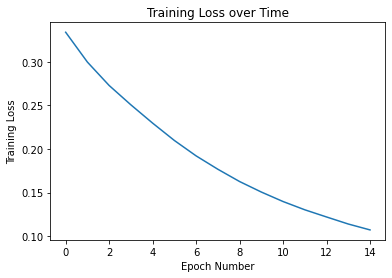

In [15]:
plt.plot(losses);
plt.title("Training Loss over Time");
plt.xlabel("Epoch Number");
plt.ylabel("Training Loss");

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [21]:
correct = total = 0

for images, labels in testData:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    with torch.no_grad():
        logprobs = network(img.cuda())

    probs = torch.exp(logprobs)
    probablist = list(probs.cpu().numpy()[0])
    pred_label = probablist.index(max(probablist))
    true_label = labels.numpy()[i]
    
    if(true_label == pred_label):
      correct += 1
    total += 1

print("Accuracy:", round(correct/total*100, 2), "%")
print("Number Correct:", correct, "Total:", total)

Accuracy: 96.52 %
Number Correct: 9652 Total: 10000


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [22]:
#hyperparameter changes: added extra hidden layer with ReLU, decreased lr, increased momentum, increased epochs

network = nn.Sequential(nn.Flatten(1, -1),
                        nn.Linear(784, 256),
                        nn.ReLU(),
                        nn.Linear(256, 128),
                        nn.ReLU(),
                        nn.Linear(128, 64),
                        nn.ReLU(),
                        nn.Linear(64, 10),
                        nn.LogSoftmax(dim=1))

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

optimizer = optim.SGD(network.parameters(), lr=0.003, momentum=0.6)
criterion = nn.NLLLoss()

network.to(device)

epochs = 50
losses = []

for e in range(epochs):
    running_loss = 0
    for images, labels in trainData:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        
        output = network(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        
    else:
        print("Epoch", e+1, "- Training Loss: ", running_loss/len(trainData))
        losses.append(running_loss/len(trainData))

Epoch 1 - Training Loss:  1.6887955642712396
Epoch 2 - Training Loss:  0.5297586738999719
Epoch 3 - Training Loss:  0.3900444884576015
Epoch 4 - Training Loss:  0.33752453178643926
Epoch 5 - Training Loss:  0.29904530089356496
Epoch 6 - Training Loss:  0.2669875161257634
Epoch 7 - Training Loss:  0.23895362568800765
Epoch 8 - Training Loss:  0.21506504590577408
Epoch 9 - Training Loss:  0.19558734821278784
Epoch 10 - Training Loss:  0.1782378531110757
Epoch 11 - Training Loss:  0.1645679317736454
Epoch 12 - Training Loss:  0.15248269471588102
Epoch 13 - Training Loss:  0.1419765200855127
Epoch 14 - Training Loss:  0.13190563826132684
Epoch 15 - Training Loss:  0.12351589890192947
Epoch 16 - Training Loss:  0.11570171539737249
Epoch 17 - Training Loss:  0.10843351974424079
Epoch 18 - Training Loss:  0.10217347246473596
Epoch 19 - Training Loss:  0.09627431558955436
Epoch 20 - Training Loss:  0.09143862383924663
Epoch 21 - Training Loss:  0.0860861227093046
Epoch 22 - Training Loss:  0.0

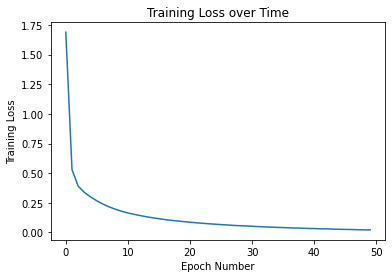

In [23]:
plt.plot(losses);
plt.title("Training Loss over Time");
plt.xlabel("Epoch Number");
plt.ylabel("Training Loss");

In [24]:
correct = total = 0

for images, labels in testData:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    with torch.no_grad():
        logprobs = network(img.cuda())

    probs = torch.exp(logprobs)
    probablist = list(probs.cpu().numpy()[0])
    pred_label = probablist.index(max(probablist))
    true_label = labels.numpy()[i]
    
    if(true_label == pred_label):
      correct += 1
    total += 1

print("Accuracy:", round(correct/total*100, 2), "%")
print("Number Correct:", correct, "Total:", total)

Accuracy: 97.66 %
Number Correct: 9766 Total: 10000


## Saving your model
Using `torch.save`, save your model for future loading.

In [25]:
torch.save(network, './model.pt') 